In [1]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [9]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [10]:
df.isna().any(axis=1).sum()

8335

In [11]:
len(df)

18524

In [12]:
(df.isna().sum(axis=1) > 1).sum()

819

In [22]:
df[['Stage_fear', 'Drained_after_socializing']] = df[['Stage_fear', 'Drained_after_socializing']].fillna(0)
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,-1.0,6.0,4.0,-1.0,15.0,5.0,Extrovert
1,1,1.0,-1.0,7.0,3.0,-1.0,10.0,8.0,Extrovert
2,2,6.0,1.0,1.0,0.0,0.0,3.0,0.0,Introvert
3,3,3.0,-1.0,7.0,3.0,-1.0,11.0,5.0,Extrovert
4,4,1.0,-1.0,4.0,4.0,-1.0,13.0,NaN,Extrovert


In [19]:
df = df.replace(['Yes','No'],[1, -1])
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17092\3015232902.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['Yes','No'],[1, -1])


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,-1.0,6.0,4.0,-1.0,15.0,5.0,Extrovert
1,1,1.0,-1.0,7.0,3.0,-1.0,10.0,8.0,Extrovert
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,-1.0,7.0,3.0,-1.0,11.0,5.0,Extrovert
4,4,1.0,-1.0,4.0,4.0,-1.0,13.0,NaN,Extrovert


In [23]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                      0
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing       0
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [25]:
df.Personality = df.Personality.replace(['Extrovert','Introvert'],[1, 0])
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17092\3593621637.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Personality = df.Personality.replace(['Extrovert','Introvert'],[1, 0])


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,-1.0,6.0,4.0,-1.0,15.0,5.0,1
1,1,1.0,-1.0,7.0,3.0,-1.0,10.0,8.0,1
2,2,6.0,1.0,1.0,0.0,0.0,3.0,0.0,0
3,3,3.0,-1.0,7.0,3.0,-1.0,11.0,5.0,1
4,4,1.0,-1.0,4.0,4.0,-1.0,13.0,NaN,1


In [26]:
df.drop(['id'],axis=1, inplace=True)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,-1.0,6.0,4.0,-1.0,15.0,5.0,1
1,1.0,-1.0,7.0,3.0,-1.0,10.0,8.0,1
2,6.0,1.0,1.0,0.0,0.0,3.0,0.0,0
3,3.0,-1.0,7.0,3.0,-1.0,11.0,5.0,1
4,1.0,-1.0,4.0,4.0,-1.0,13.0,NaN,1


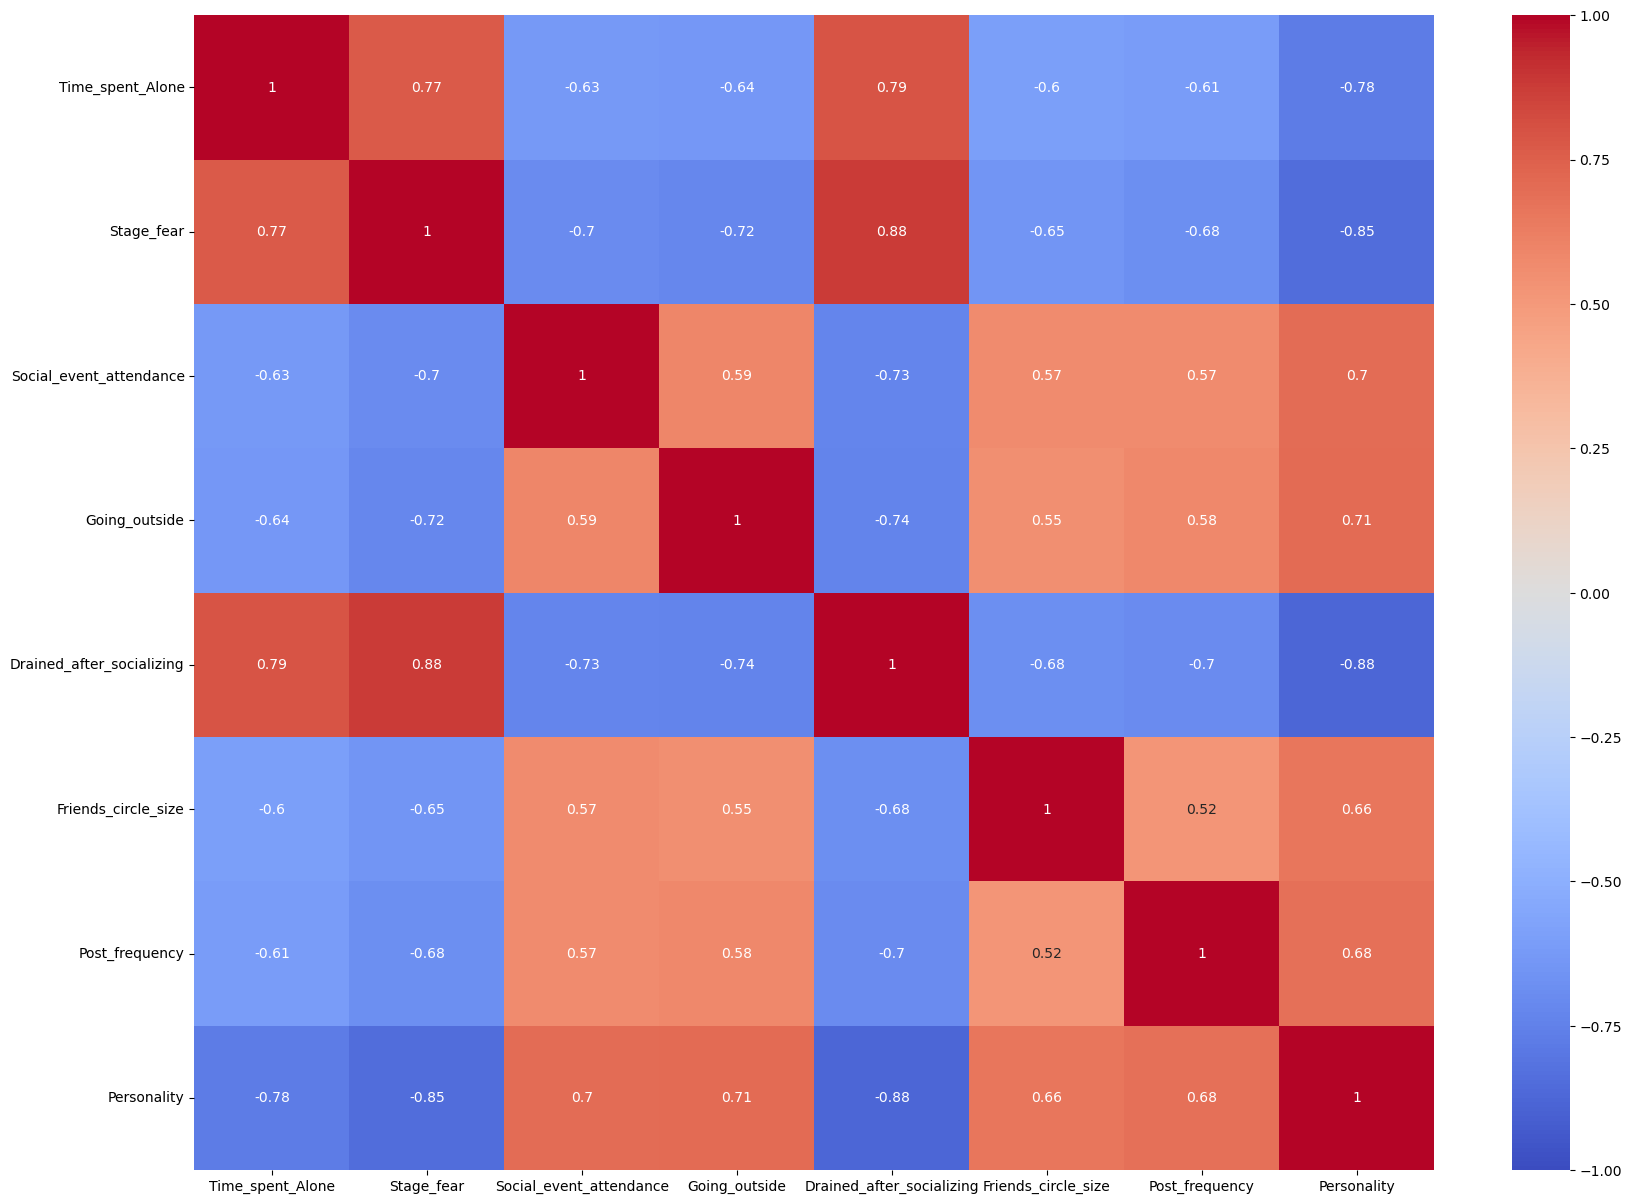

In [27]:
corr_mat=df.corr()
corr_mat=np.around(corr_mat,decimals=2)
fig=plt.figure(figsize=(20, 15))
sn.heatmap(corr_mat, annot=True, fmt='g', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

In [28]:
Y=df['Personality']
X=df.drop(['Personality'],axis=1)
print(Y.shape, X.shape)

(18524,) (18524, 7)


In [37]:
num_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside','Friends_circle_size','Post_frequency']
cat_features = ['Stage_fear', 'Drained_after_socializing']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape,X_test.shape)

(14819, 7) (3705, 7)


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
def scores():
    print('Acc. Score: ', accuracy_score(Y_test,Y_pred))
    print('F1 Score: ', f1_score(Y_test,Y_pred))
    print('Precision: ', precision_score(Y_test,Y_pred))
    print('Recall: ', recall_score(Y_test,Y_pred))  
def confus_mat():
    LABELS = ['Introvert', 'Extrovert']
    conf_mat = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5, 5))
    sn.heatmap(conf_mat, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cbar=False, cmap='Greens');
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
def var():
    print('Train accuracy: ', accuracy_score(Y_train,Y_pred_train))
    print('Test accuracy: ', accuracy_score(Y_test,Y_pred))
def metrics():
    scores()
    confus_mat()
    var()

### kNN classifier

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [41]:
num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', 'passthrough', cat_features)
])

kNN_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

Acc. Score:  0.9673414304993252
F1 Score:  0.9778185151237397
Precision:  0.9787155963302753
Recall:  0.9769230769230769


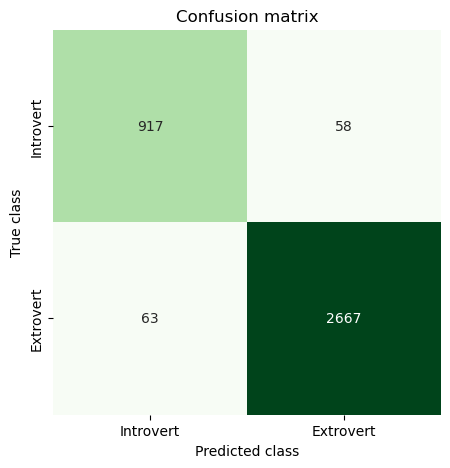

Train accuracy:  0.9700384641338822
Test accuracy:  0.9673414304993252


In [42]:
kNN_model.fit(X_train,Y_train)
Y_pred=kNN_model.predict(X_test)
Y_pred_train=kNN_model.predict(X_train)
metrics()

### logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [43]:
num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', 'passthrough', cat_features)
])

logi_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

Acc. Score:  0.9673414304993252
F1 Score:  0.9778103796075555
Precision:  0.979067205288285
Recall:  0.9765567765567765


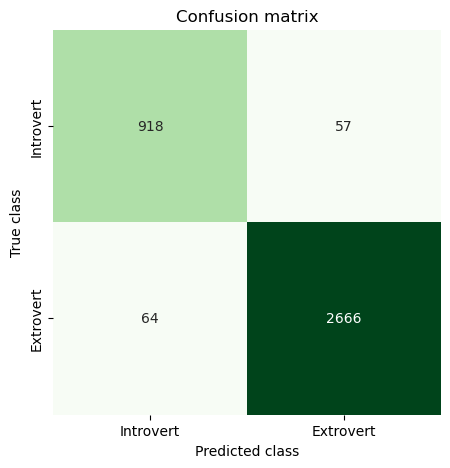

Train accuracy:  0.9694311357041636
Test accuracy:  0.9673414304993252


In [44]:
logi_model.fit(X_train,Y_train)
Y_pred=logi_model.predict(X_test)
Y_pred_train=logi_model.predict(X_train)
metrics()

### Test data set (output)

In [119]:
df_op = pd.read_csv('data/test.csv')
df_op.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [120]:
X_op=df_test.drop(['id'],axis=1)
X_op.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,No,7.0,4.0,No,6.0,NaN
1,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [122]:
X_op = X_op.replace(['Yes','No'],[1, 0])
X_op.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,0.0,7.0,4.0,0.0,6.0,NaN
1,NaN,1.0,0.0,0.0,1.0,5.0,1.0
2,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,9.0,1.0,1.0,2.0,1.0,1.0,1.0


In [123]:
X_imp = KNN(k=3).fit_transform(X_op)
X_op = pd.DataFrame(X_imp, columns=X_op.columns, index=X_op.index)

Imputing row 1/6175 with 1 missing, elapsed time: 4.659
Imputing row 101/6175 with 1 missing, elapsed time: 4.660
Imputing row 201/6175 with 0 missing, elapsed time: 4.660
Imputing row 301/6175 with 0 missing, elapsed time: 4.660
Imputing row 401/6175 with 1 missing, elapsed time: 4.660
Imputing row 501/6175 with 0 missing, elapsed time: 4.660
Imputing row 601/6175 with 1 missing, elapsed time: 4.660
Imputing row 701/6175 with 1 missing, elapsed time: 4.660
Imputing row 801/6175 with 0 missing, elapsed time: 4.660
Imputing row 901/6175 with 1 missing, elapsed time: 4.675
Imputing row 1001/6175 with 1 missing, elapsed time: 4.675
Imputing row 1101/6175 with 1 missing, elapsed time: 4.675
Imputing row 1201/6175 with 1 missing, elapsed time: 4.675
Imputing row 1301/6175 with 1 missing, elapsed time: 4.675
Imputing row 1401/6175 with 0 missing, elapsed time: 4.675
Imputing row 1501/6175 with 2 missing, elapsed time: 4.675
Imputing row 1601/6175 with 1 missing, elapsed time: 4.675
Imputing 

In [124]:
X_op.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.000000,0.0,7.0,4.0,0.0,6.0,6.666667
1,8.333333,1.0,0.0,0.0,1.0,5.0,1.000000
2,3.000000,0.0,5.0,6.0,0.0,15.0,9.000000
3,3.000000,0.0,4.0,4.0,0.0,5.0,6.000000
4,9.000000,1.0,1.0,2.0,1.0,1.0,1.000000


In [125]:
X_op=Scal.transform(X_op[num_features])
Y_op=kNN.predict(X_op)

In [126]:
df_out = df_op['id'].to_frame()

In [127]:
df_out['Personality'] = np.array(Y_op)
df_out.head()

,id,Personality
0,18524,1
1,18525,0
2,18526,1
3,18527,1
4,18528,0


In [128]:
df_out.Personality = df2.Personality.replace([1, 0],['Extrovert','Introvert'])
df_out.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Introvert
3,18527,Extrovert
4,18528,Extrovert


In [129]:
df_out.to_csv('data/output_data.csv', index=False)